In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv(r"C:\Users\tangu\Downloads\spam.csv")
df.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [41]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [42]:
df.Message.describe()

count                       5572
unique                      5157
top       Sorry, I'll call later
freq                          30
Name: Message, dtype: object

Data Visualization

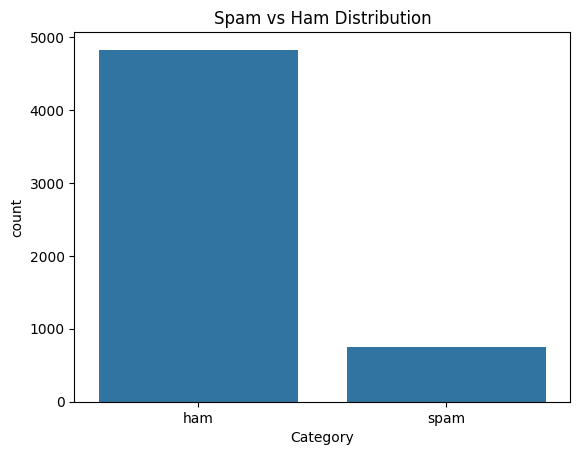

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Category', data=df) 
plt.title('Spam vs Ham Distribution')
plt.show()

In [44]:
!pip install wordcloud

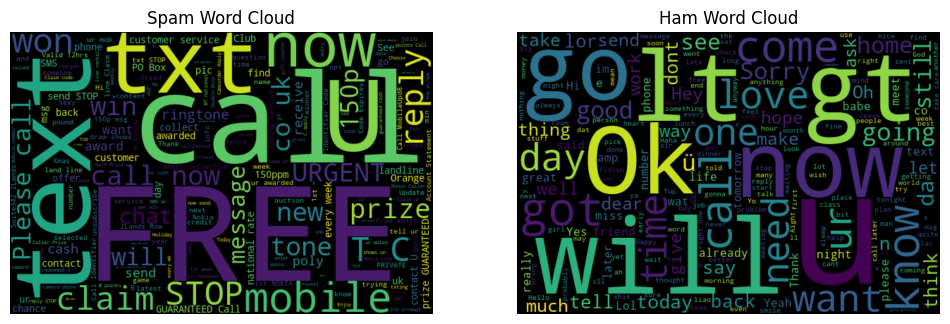

In [45]:
from wordcloud import WordCloud

spam_words = " ".join(df[df['Category']=='spam']['Message'])
ham_words = " ".join(df[df['Category']=='ham']['Message'])

spam_wc = WordCloud(width=600, height=400).generate(spam_words)
ham_wc = WordCloud(width=600, height=400).generate(ham_words)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


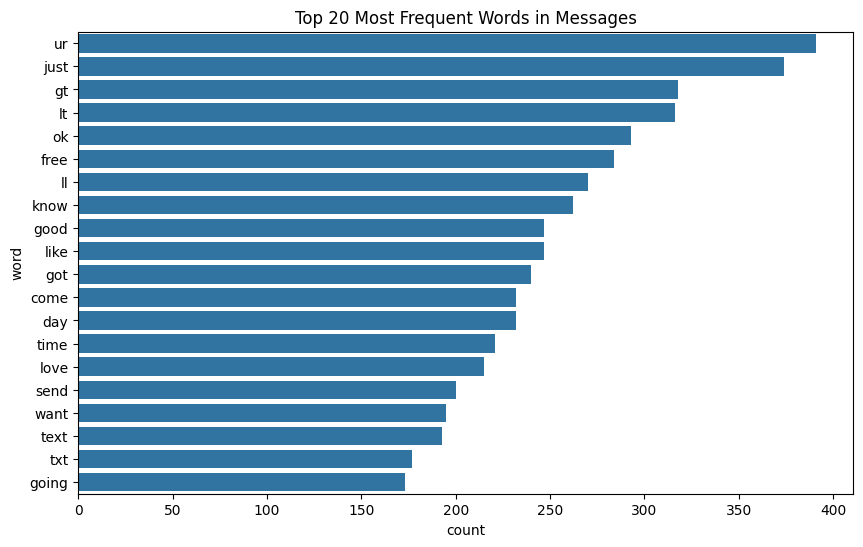

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['Message'])

word_freq = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'word': words, 'count': word_freq})
top_words = word_freq_df.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(data=top_words, x='count', y='word')
plt.title("Top 20 Most Frequent Words in Messages")
plt.show()


Data Tranformation

In [47]:
df.replace({'Category' :{'spam':1,'ham':0}},inplace=True)

Building Model

In [48]:
y  = df.Category
X = df.Message

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

1.Logistic Regression

In [51]:
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_count,y_train)
y_pred_lr = model_lr.predict(X_test_count)

accuracy_lr=round(accuracy_score(y_test,y_pred_lr)* 100, 2)
ms_lr = round(model_lr.score(X_train_count, y_train) * 100, 2)

cm = confusion_matrix(y_test, y_pred_lr,)
accuracy = accuracy_score(y_test,y_pred_lr)
precision =precision_score(y_test, y_pred_lr,average='micro')
recall =  recall_score(y_test, y_pred_lr,average='micro')
f1 = f1_score(y_test,y_pred_lr,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[965   1]
 [ 15 134]]
accuracy_Logistic Regression : 0.986
precision_Logistic Regression : 0.986
recall_Logistic Regression: 0.986
f1-score_Logistic Regression : 0.986


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Classifier": SVC()
}
scores = []
for name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)
    
    accuracy=round(accuracy_score(y_test,y_pred)* 100, 2)
    ms = round(model.score(X_train_count, y_train) * 100, 2)

    scores.append({
            'Model_Name':name,
            'Accuracy':accuracy,
            'Model_Score':ms
        }
    )

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    print(f"\n {name}")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")



 Decision Tree
Confusion Matrix:
 [[953  13]
 [ 16 133]]
Accuracy: 0.974
Precision: 0.974
Recall: 0.974
F1 Score: 0.974

 Random Forest
Confusion Matrix:
 [[966   0]
 [ 22 127]]
Accuracy: 0.980
Precision: 0.980
Recall: 0.980
F1 Score: 0.980

 K-Nearest Neighbors
Confusion Matrix:
 [[966   0]
 [ 83  66]]
Accuracy: 0.926
Precision: 0.926
Recall: 0.926
F1 Score: 0.926

 Multinomial Naive Bayes
Confusion Matrix:
 [[966   0]
 [  9 140]]
Accuracy: 0.992
Precision: 0.992
Recall: 0.992
F1 Score: 0.992

 Support Vector Classifier
Confusion Matrix:
 [[966   0]
 [ 17 132]]
Accuracy: 0.985
Precision: 0.985
Recall: 0.985
F1 Score: 0.985


In [53]:
scores.append({
            'Model_Name':'LogisticRegression',
            'Accuracy':accuracy_lr,
            'Model_Score':ms_lr
})

In [54]:
results_df = pd.DataFrame(scores) 
results_df

,Model_Name,Accuracy,Model_Score
0,Decision Tree,97.40,100.00
1,Random Forest,98.03,100.00
2,K-Nearest Neighbors,92.56,92.91
3,Multinomial Naive Bayes,99.19,99.33
4,Support Vector Classifier,98.48,99.57
5,LogisticRegression,98.57,99.80


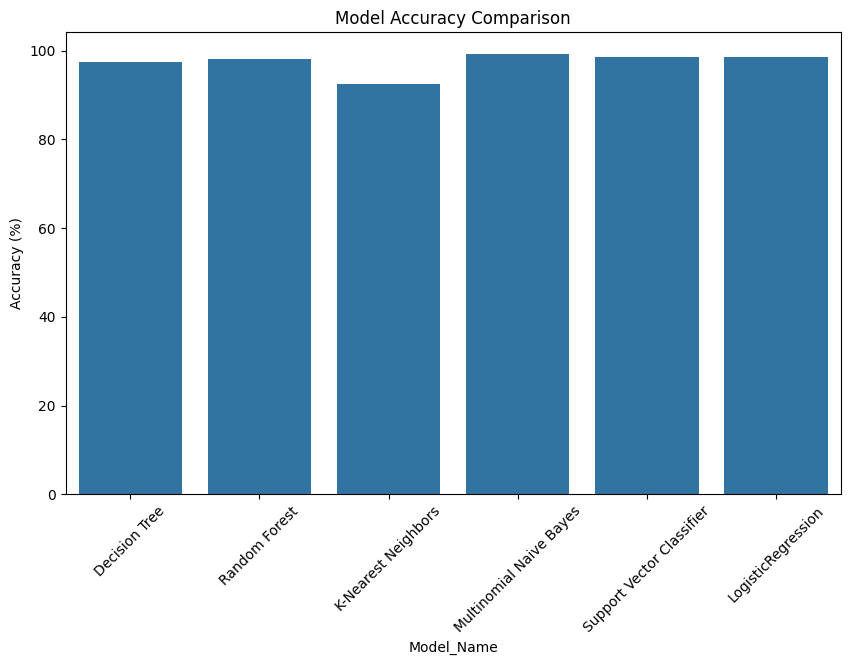

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Model_Name', y='Accuracy')
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.show()
